step 1


Number of iterations:
Gradient Descent: 20
Newton's Method: 2
Conjugate Gradient: 2
Condition Number of Hessian: 50.0
Gradient Descent: [[[-2.00000000e+00]
  [ 1.00000000e+00]]

 [[-1.90000000e+00]
  [-1.50000000e+00]]

 [[-1.80500000e+00]
  [ 2.25000000e+00]]

 [[-1.71475000e+00]
  [-3.37500000e+00]]

 [[-1.62901250e+00]
  [ 5.06250000e+00]]

 [[-1.54756187e+00]
  [-7.59375000e+00]]

 [[-1.47018378e+00]
  [ 1.13906250e+01]]

 [[-1.39667459e+00]
  [-1.70859375e+01]]

 [[-1.32684086e+00]
  [ 2.56289062e+01]]

 [[-1.26049882e+00]
  [-3.84433594e+01]]

 [[-1.19747388e+00]
  [ 5.76650391e+01]]

 [[-1.13760018e+00]
  [-8.64975586e+01]]

 [[-1.08072018e+00]
  [ 1.29746338e+02]]

 [[-1.02668417e+00]
  [-1.94619507e+02]]

 [[-9.75349958e-01]
  [ 2.91929260e+02]]

 [[-9.26582460e-01]
  [-4.37893890e+02]]

 [[-8.80253337e-01]
  [ 6.56840836e+02]]

 [[-8.36240670e-01]
  [-9.85261253e+02]]

 [[-7.94428637e-01]
  [ 1.47789188e+03]]

 [[-7.54707205e-01]
  [-2.21683782e+03]]

 [[-7.16971845e-01]
  [

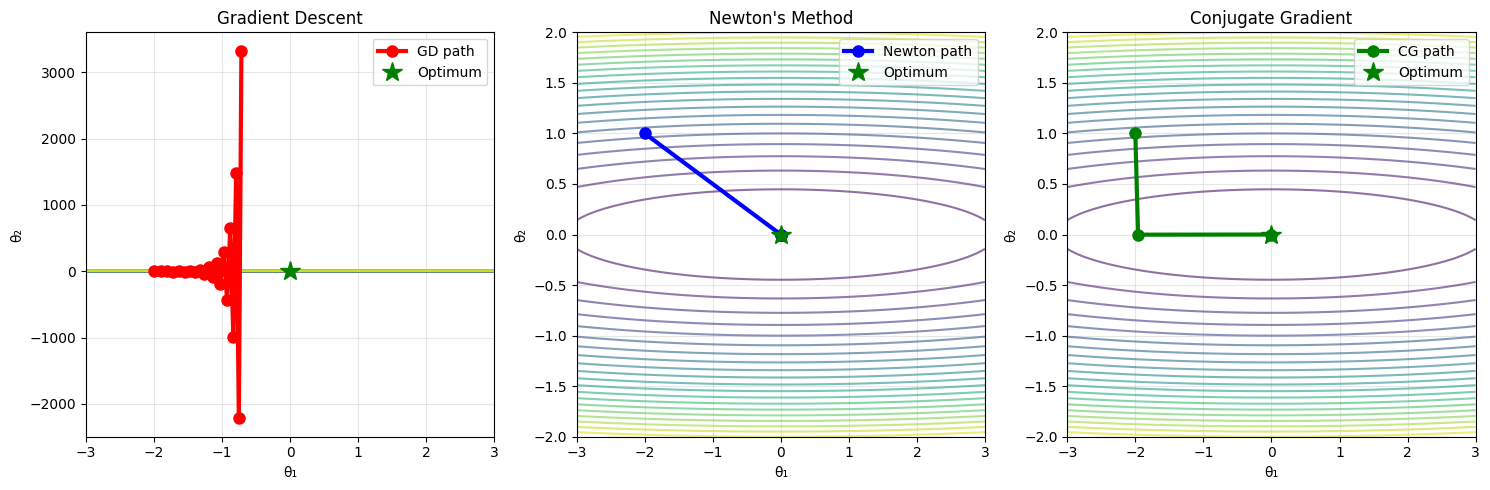

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Hessian matrix (Ill-conditioned)
H = np.array([[1.0, 0.0], [0.0, 50.0]])

# Quadratic cost function
def cost_func(v):
    return 0.5 * v.T @ H @ v

theta0 = np.array([[-2.0], [1.0]])

def gradient_descent(theta, alpha=0.1, max_iter=20, tol=1e-6):
    path_gd = [theta.copy()]
    for i in range(max_iter):
        grad = H @ theta
        theta_new = theta - alpha * grad
        path_gd.append(theta_new.copy())
        if np.linalg.norm(grad) < tol:
            break
        theta = theta_new
    return np.array(path_gd)

def newton_method(theta, max_iter=10, tol=1e-6):
    path_newton = [theta.copy()]
    H_inv = np.linalg.inv(H)
    for i in range(max_iter):
        grad = H @ theta
        theta_new = theta - H_inv @ grad
        path_newton.append(theta_new.copy())
        if np.linalg.norm(grad) < tol:
            break
        theta = theta_new
    return np.array(path_newton)

def conjugate_gradient(theta0, max_iter=10, tol=1e-10):
    theta = theta0.copy()
    path = [theta.copy()]

    g = H @ theta  # initial gradient
    p = -g           # initial search direction

    for k in range(max_iter):
        if np.linalg.norm(g) < tol:
            print(f"CG converged at iteration {k}")
            break

        Hp = H @ p
        alpha = (g.T @ g) / (p.T @ Hp)

        theta = theta + alpha * p
        path.append(theta.copy())

        g_new = H @ theta
        if np.linalg.norm(g_new) < tol:
            break

        beta = (g_new.T @ g_new) / (g.T @ g)
        p = -g_new + beta * p
        g = g_new

    return np.array(path)

path_gd = gradient_descent(theta0.copy(), alpha=0.05)
path_newton = newton_method(theta0.copy())
path_cg = conjugate_gradient(theta0)

print(f"\nNumber of iterations:")
print(f"Gradient Descent: {len(path_gd)-1}")
print(f"Newton's Method: {len(path_newton)-1}")
print(f"Conjugate Gradient: {len(path_cg)-1}")
print(f"Condition Number of Hessian: {np.linalg.cond(H):.1f}")

print(f"Gradient Descent: {path_gd}")
print(f"Newton's Method: {path_newton}")

x = np.linspace(-3, 3, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        theta = np.array([X[i,j], Y[i,j]])
        Z[i,j] = cost_func(theta)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.contour(X, Y, Z, levels=20, alpha=0.6)
plt.plot(path_gd[:, 0], path_gd[:, 1], 'ro-', linewidth=3, markersize=8, label='GD path')
plt.plot(0, 0, 'g*', markersize=15, label='Optimum')
plt.xlabel('θ₁'); plt.ylabel('θ₂')
plt.title('Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.contour(X, Y, Z, levels=20, alpha=0.6)
plt.plot(path_newton[:, 0], path_newton[:, 1], 'bo-', linewidth=3, markersize=8, label='Newton path')
plt.plot(0, 0, 'g*', markersize=15, label='Optimum')
plt.xlabel('θ₁'); plt.ylabel('θ₂')
plt.title("Newton's Method")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.contour(X, Y, Z, levels=20, alpha=0.6)
plt.plot(path_cg[:, 0], path_cg[:, 1], 'go-', linewidth=3, markersize=8, label='CG path')
plt.plot(0, 0, 'g*', markersize=15, label='Optimum')
plt.xlabel('θ₁'); plt.ylabel('θ₂')
plt.title('Conjugate Gradient')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


step 2

Loading Breast Cancer dataset...
Total parameters: 161
SGD - Train Loss: 0.0421, Test Acc: 0.9474, Time: 0.55s
L-BFGS - Train Loss: 0.0056, Test Acc: 0.9737, Time: 0.07s
CG - Train Loss: 0.7071, Test Acc: 0.4123, Time: 0.22s
  CG details: 48 fn calls, 37 grad calls, warnflag: 2


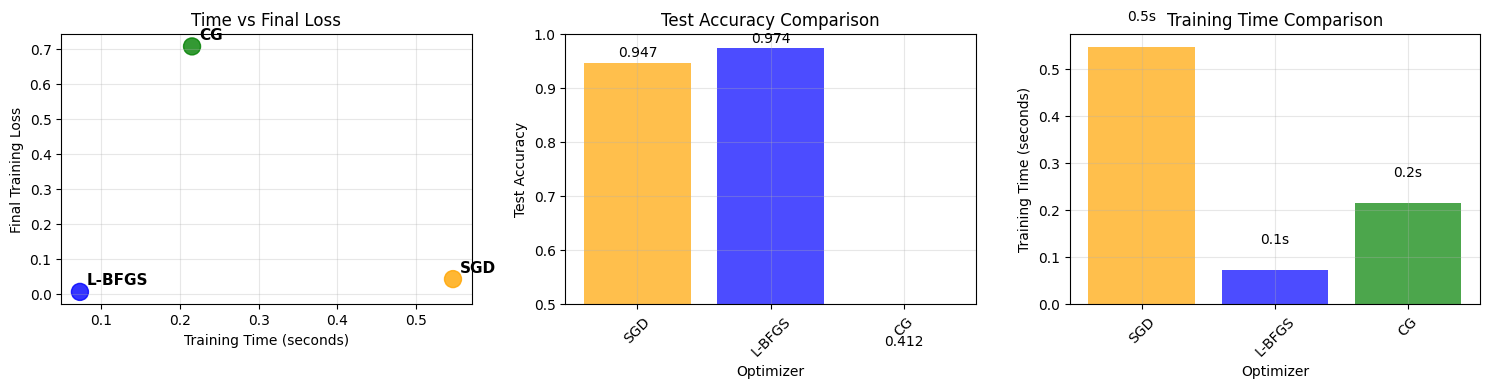

Optimizer  Time(s)    Loss         Accuracy  
SGD        0.55       0.0421       0.9474    
L-BFGS     0.07       0.0056       0.9737    
CG         0.22       0.7071       0.4123    


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from scipy.optimize import fmin_cg
import time

print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

hidden_size = 5
input_size = X_train.shape[1]
output_size = 1
total_params = (input_size * hidden_size + hidden_size) + (hidden_size * output_size + output_size)
print(f"Total parameters: {total_params}")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass(params_flat, X):
    idx = 0
    W1 = params_flat[idx:idx+30*5].reshape(30, 5)
    idx += 30*5
    b1 = params_flat[idx:idx+5].reshape(5, 1)
    idx += 5
    W2 = params_flat[idx:idx+5*1].reshape(5, 1)
    idx += 5
    b2 = params_flat[idx:idx+1].reshape(1, 1)

    z1 = X @ W1 + b1.T
    a1 = np.tanh(z1)
    z2 = a1 @ W2 + b2.T
    y_pred = sigmoid(z2)

    cache = (X, W1, b1, a1, W2, b2, z2, y_pred)
    return y_pred, cache

def cost_function(params_flat, X, y):
    y_pred, _ = forward_pass(params_flat, X)

    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def gradient_function(params_flat, X, y):
    y_pred, cache = forward_pass(params_flat, X)
    X_data, W1, b1, a1, W2, b2, z2, _ = cache

    m = X.shape[0]

    dz2 = y_pred - y.reshape(-1, 1)  # dL/dz2
    dW2 = (1/m) * (a1.T @ dz2)  # dL/dW2
    db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True).T  # dL/db2

    da1 = dz2 @ W2.T  # dL/da1
    dz1 = da1 * (1 - a1**2)  # dL/dz1 (tanh derivative)
    dW1 = (1/m) * (X_data.T @ dz1)  # dL/dW1
    db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True).T  # dL/db1

    # Flatten gradients
    grad_flat = np.concatenate([dW1.flatten(), db1.flatten(),
                                dW2.flatten(), db2.flatten()])
    return grad_flat

def evaluate_model(params_flat, X, y):
    """Evaluate model accuracy"""
    y_pred, _ = forward_pass(params_flat, X)
    y_pred_class = (y_pred > 0.5).astype(int).flatten()
    accuracy = np.mean(y_pred_class == y)
    return accuracy

# SGD
def train_sgd():
    start_time = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=(hidden_size,),
        solver='sgd',
        learning_rate_init=0.01,
        max_iter=1000,
        random_state=42,
        tol=1e-4,
        verbose=False
    )
    mlp_sgd.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_loss = mlp_sgd.loss_
    test_acc = mlp_sgd.score(X_test, y_test)

    print(f"SGD - Train Loss: {train_loss:.4f}, Test Acc: {test_acc:.4f}, Time: {train_time:.2f}s")
    return train_time, train_loss, test_acc

# L-BFGS (Quasi-Newton)
def train_lbfgs():
    start_time = time.time()
    mlp_lbfgs = MLPClassifier(
        hidden_layer_sizes=(hidden_size,),
        solver='lbfgs',
        max_iter=500,
        random_state=42,
        tol=1e-4,
        verbose=False
    )
    mlp_lbfgs.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_loss = mlp_lbfgs.loss_
    test_acc = mlp_lbfgs.score(X_test, y_test)

    print(f"L-BFGS - Train Loss: {train_loss:.4f}, Test Acc: {test_acc:.4f}, Time: {train_time:.2f}s")
    return train_time, train_loss, test_acc

# Conjugate Gradient
def train_cg():
    start_time = time.time()

    np.random.seed(42)
    params0 = np.random.randn(total_params) * 0.1

    def f(params):
        return cost_function(params, X_train, y_train)

    def fprime(params):
        return gradient_function(params, X_train, y_train)

    result, fopt, func_calls, grad_calls, warnflag = fmin_cg(
        f=f,
        x0=params0,
        fprime=fprime,
        maxiter=200,
        full_output=True,
        disp=False
    )

    train_time = time.time() - start_time

    # Evaluate
    train_loss = fopt
    train_acc = evaluate_model(result, X_train, y_train)
    test_acc = evaluate_model(result, X_test, y_test)

    print(f"CG - Train Loss: {train_loss:.4f}, Test Acc: {test_acc:.4f}, Time: {train_time:.2f}s")
    print(f"  CG details: {func_calls} fn calls, {grad_calls} grad calls, warnflag: {warnflag}")

    return train_time, train_loss, test_acc


results = {}
optimizers = ['SGD', 'L-BFGS', 'CG']

for opt in optimizers:
    if opt == 'SGD':
        t, l, a = train_sgd()
    elif opt == 'L-BFGS':
        t, l, a = train_lbfgs()
    else:
        t, l, a = train_cg()

    results[opt] = (t, l, a)

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

optimizers = list(results.keys())
times = [results[opt][0] for opt in optimizers]
losses = [results[opt][1] for opt in optimizers]
accs = [results[opt][2] for opt in optimizers]

# Time vs Loss scatter
ax1.scatter(times, losses, s=150, alpha=0.8, color=['orange', 'blue', 'green'])
for i, opt in enumerate(optimizers):
    ax1.annotate(opt, (times[i], losses[i]), xytext=(5, 5),
                textcoords='offset points', fontsize=11, fontweight='bold')
ax1.set_xlabel('Training Time (seconds)')
ax1.set_ylabel('Final Training Loss')
ax1.set_title('Time vs Final Loss')
ax1.grid(True, alpha=0.3)

# Accuracy bar chart
x_pos = np.arange(len(optimizers))
bars = ax2.bar(x_pos, accs, alpha=0.7, color=['orange', 'blue', 'green'])
ax2.set_xlabel('Optimizer')
ax2.set_ylabel('Test Accuracy')
ax2.set_title('Test Accuracy Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(optimizers, rotation=45)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0.5, 1.0])

# Add accuracy values on bars
for bar, acc in zip(bars, accs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{acc:.3f}', ha='center', va='bottom')

# Time comparison bar chart
bars = ax3.bar(x_pos, times, alpha=0.7, color=['orange', 'blue', 'green'])
ax3.set_xlabel('Optimizer')
ax3.set_ylabel('Training Time (seconds)')
ax3.set_title('Training Time Comparison')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(optimizers, rotation=45)
ax3.grid(True, alpha=0.3)

# Add time values on bars
for bar, t in zip(bars, times):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{t:.1f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"{'Optimizer':<10} {'Time(s)':<10} {'Loss':<12} {'Accuracy':<10}")
for opt in optimizers:
    t, l, a = results[opt]
    print(f"{opt:<10} {t:<10.2f} {l:<12.4f} {a:<10.4f}")


step 3

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.99MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]

Device: cpu
Dataset: FashionMNIST
Model: 3 hidden layers x 100 neurons



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[adam] Epoch 01/30  train_loss=0.5837 train_acc=0.7888  val_loss=0.4620 val_acc=0.8277  time=19.1s
[adam] Epoch 02/30  train_loss=0.3980 train_acc=0.8544  val_loss=0.3964 val_acc=0.8579  time=36.7s
[adam] Epoch 03/30  train_loss=0.3574 train_acc=0.8677  val_loss=0.3870 val_acc=0.8585  time=54.1s
[adam] Epoch 04/30  train_loss=0.3328 train_acc=0.8778  val_loss=0.3853 val_acc=0.8598  time=73.2s
[adam] Epoch 05/30  train_loss=0.3113 train_acc=0.8846  val_loss=0.3722 val_acc=0.8673  time=91.0s
[adam] Epoch 06/30  train_loss=0.2935 train_acc=0.8911  val_loss=0.3491 val_acc=0.8741  time=110.2s
[adam] Epoch 07/30  train_loss=0.2831 train_acc=0.8950  val_loss=0.3388 val_acc=0.8779  time=128.1s
[adam] Epoch 08/30  train_loss=0.2729 train_acc=0.8982  val_loss=0.3440 val_acc=0.8767  time=145.8s
[adam] Epoch 09/30  train_loss=0.2574 train_acc=0.9037  val_loss=0.3425 val_acc=0.8794  time=164.7s
[adam] Epoch 10/30  train_loss=0.2514 train_acc=0.9063  val_loss=0.3425 val_acc=0.8807  time=182.2s
[adam

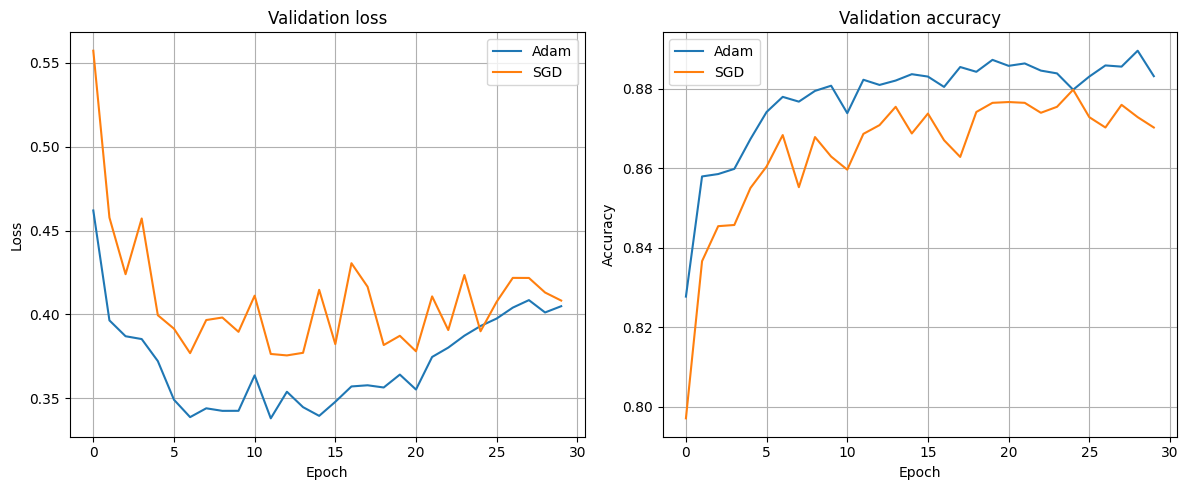

Adam: final_val_acc=0.8831, epochs_to_50%=1, epochs_to_80%=1, total_time=552.8s
SGD: final_val_acc=0.8702, epochs_to_50%=1, epochs_to_80%=2, total_time=548.5s


In [1]:
import time
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

dataset_name = "FashionMNIST"
batch_size = 128
input_dim = 28 * 28
hidden_size = 100
hidden_layers = 3
num_classes = 10
epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_ds = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_ds  = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=1024, shuffle=False, num_workers=2, pin_memory=True)


#model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_size, hidden_layers, num_classes):
        super().__init__()
        layers = []
        in_dim = input_dim
        for i in range(hidden_layers):
            layers.append(nn.Linear(in_dim, hidden_size))
            layers.append(nn.ReLU())
            in_dim = hidden_size
        layers.append(nn.Linear(in_dim, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)

def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    loss_sum = 0.0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            loss_sum += loss.item() * xb.size(0)
            preds = out.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += xb.size(0)
    return loss_sum / total, correct / total

def train_one_epoch(model, loader, optimizer, device):
    model.train()
    criterion = nn.CrossEntropyLoss()
    total_loss = 0.0
    total_correct = 0
    total = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
        total_correct += (out.argmax(dim=1) == yb).sum().item()
        total += xb.size(0)
    return total_loss / total, total_correct / total

def run_experiment(optimizer_name, lr, momentum=0.9, weight_decay=0.0):
    model = MLP(input_dim, hidden_size, hidden_layers, num_classes).to(device)
    if optimizer_name == "adam":
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    else:
        raise ValueError("Unknown optimizer")
    history = {
        "train_loss": [], "train_acc": [],
        "val_loss": [], "val_acc": [],
        "time_elapsed": []
    }
    t0 = time.time()
    for ep in range(1, epochs + 1):
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, device)
        val_loss, val_acc = evaluate(model, test_loader, device)
        elapsed = time.time() - t0
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)
        history["time_elapsed"].append(elapsed)
        print(f"[{optimizer_name}] Epoch {ep:02d}/{epochs}  train_loss={train_loss:.4f} train_acc={train_acc:.4f}  val_loss={val_loss:.4f} val_acc={val_acc:.4f}  time={elapsed:.1f}s")
    return history

adam_lr = 1e-3
sgd_lr = 0.1

print("Device:", device)
print("Dataset:", dataset_name)
print("Model: 3 hidden layers x", hidden_size, "neurons")

# Run experiments
hist_adam = run_experiment("adam", lr=adam_lr)
# small pause to avoid nondeterministic overlap on GPU
torch.cuda.synchronize() if torch.cuda.is_available() else None
hist_sgd  = run_experiment("sgd",  lr=sgd_lr, momentum=0.9)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Validation loss")
plt.plot(hist_adam["val_loss"], label="Adam")
plt.plot(hist_sgd["val_loss"],  label="SGD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Validation accuracy")
plt.plot(hist_adam["val_acc"], label="Adam")
plt.plot(hist_sgd["val_acc"],  label="SGD")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("adam_vs_sgd_val.png", dpi=150)
print("Saved plot: adam_vs_sgd_val.png")
plt.show()

def epochs_to_threshold(val_acc_list, threshold):
    for i, v in enumerate(val_acc_list, start=1):
        if v >= threshold:
            return i
    return None

for name, h in [("Adam", hist_adam), ("SGD", hist_sgd)]:
    e50 = epochs_to_threshold(h["val_acc"], 0.50)
    e80 = epochs_to_threshold(h["val_acc"], 0.80)
    final_acc = h["val_acc"][-1]
    total_time = h["time_elapsed"][-1]
    print(f"{name}: final_val_acc={final_acc:.4f}, epochs_to_50%={e50}, epochs_to_80%={e80}, total_time={total_time:.1f}s")


step 4

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-285996177.py:12: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


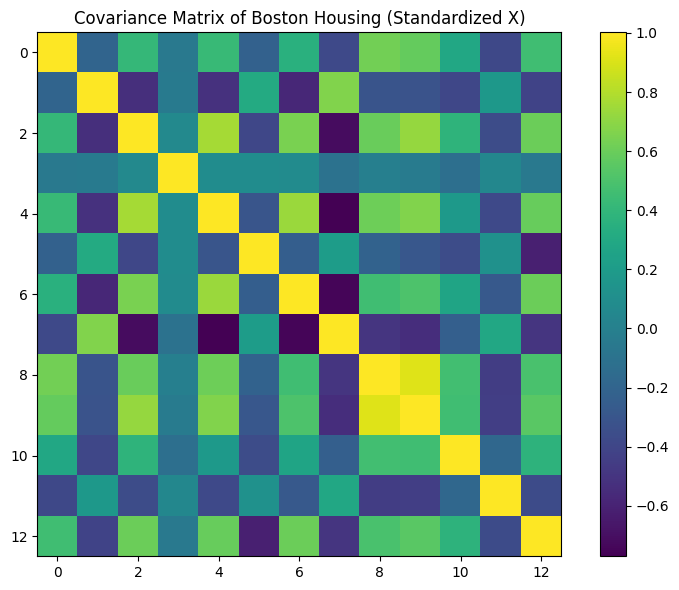

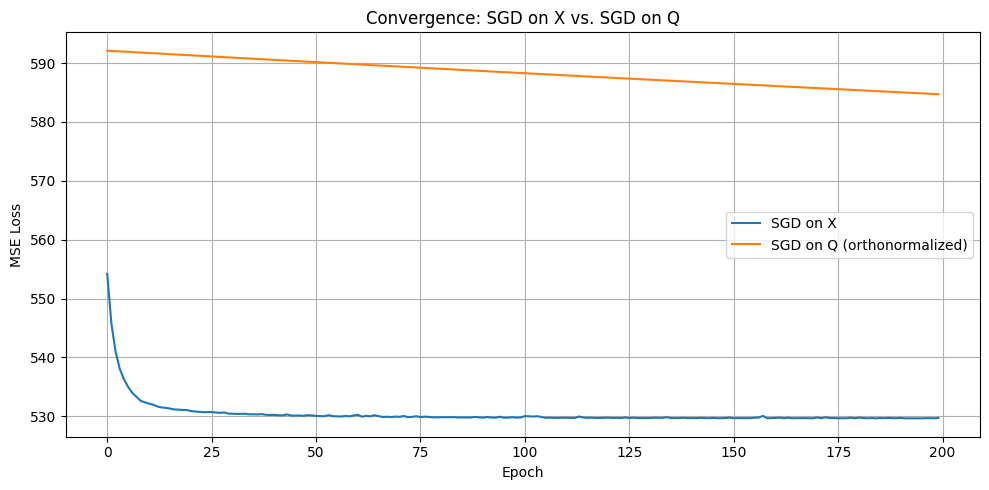

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import pandas as pd

# data = fetch_california_housing()
# X = data.data
# y = data.target.reshape(-1, 1)

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2].reshape(-1, 1)
X = data.copy()
y = target.copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

n, d = X.shape

cov = np.cov(X, rowvar=False)

plt.figure(figsize=(8,6))
plt.imshow(cov, cmap='viridis')
plt.colorbar()
plt.title("Covariance Matrix of Boston Housing (Standardized X)")
plt.tight_layout()
plt.show()

Q, R = np.linalg.qr(X)

def sgd_linear_regression(X, y, lr=0.01, epochs=200, batch_size=32):
    n, d = X.shape
    w = np.zeros((d, 1))

    losses = []
    for epoch in range(epochs):
        # shuffle
        idx = np.random.permutation(n)
        X_shuffled = X[idx]
        y_shuffled = y[idx]

        # mini-batch SGD
        for i in range(0, n, batch_size):
            xb = X_shuffled[i:i+batch_size]
            yb = y_shuffled[i:i+batch_size]

            pred = xb @ w
            grad = (1/len(xb)) * xb.T @ (pred - yb)
            w = w - lr * grad

        # compute loss at epoch end
        loss = np.mean((X @ w - y)**2)
        losses.append(loss)

    return w, losses

w_X, losses_X = sgd_linear_regression(X, y, lr=0.01, epochs=200)
w_Q, losses_Q = sgd_linear_regression(Q, y, lr=0.01, epochs=200)

plt.figure(figsize=(10,5))
plt.plot(losses_X, label="SGD on X")
plt.plot(losses_Q, label="SGD on Q (orthonormalized)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Convergence: SGD on X vs. SGD on Q")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()